[Origingal notes](JHMI Paper Notes 20180712.md)

# Redox basics

$$E_{h,pH=x} = E_{m,pH=x} + \frac{2.3RT}{nF}log_{10}\frac{[oxidised]}{[reduced]}$$

where $E_{m,pH=x}$ is the midpoint potential

# The pool size of glutathione is critifal for preventing oxidative stress in the mitochondria

Proof:

1. When standard conditnon (1M GSSG and 1M GSH), at $25^{o}C$ and pH 7.0
    $$E^{o'}=-240 \text{ mV}$$
2. The total gluthaion pool concentration 
    $$[GSH] + 2[GSSH] = 10mM$$
3. Typical for the cytoplasm, a thiol redox potential of -200 mV implies a concentration of [GSSG] of 1.2mM
    $$-200 \text{ mV } = E^{o'} + 30log_{10}\frac{[GSSG]}{[10-2[GSSG]^{2}]}$$

Then
    $$[GSSG] = 1.2 mM$$
    
4. If  the pool size is lowered to 1mM, then [GSSG] must be decreased to 20 $\mu M$ to maintain the redox potential.
    * Causes problem of enzyme to reduce GSSG to GSH.
    * Explain why a maintained pool size of glutahione is critical for preventing oxidative stress in the mitochondria
:::

$$GSSH = \frac{Total\frac{E_{h}-E_{0}}{30}}{1 + \frac{E_{h}-E_{0}}{30}}$$

High GSSH pool, GSSH= min [0.00154143890036426, 0.0648744494357635]
Low GSSH pool, GSSH= [2.06631955341645e-5, 0.0483952251405936]


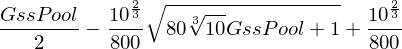

In [82]:
import matplotlib.pyplot as plt 
import numpy as np
from sympy import *
init_printing()
def GSSH_redox_potential(E_standard, oxidised, reduced):
    
    return E_standard + 30*(log(oxidised/reduced**2)/log(10))

# Physiological Value
gss_pool = var("GssPool")
gssh = Symbol('GSSH')
gsh = gss_pool - 2 * gssh
E_standard = -240
thio_redox = -200

print('High GSSH pool, GSSH= min',solve(GSSH_redox_potential(E_standard, gssh, 10e-3-gssh)-thio_redox
            , gssh))
print('Low GSSH pool, GSSH=',solve(GSSH_redox_potential(E_standard, gssh, 1e-3-gssh)-thio_redox
            , gssh))

# Solving the concentration of GSSH in control
exp_gsshs = solve(GSSH_redox_potential(E_standard, gssh, gsh)-thio_redox, gssh)
exp_gsshs[0]

Text(0.5,1,'GSS pool concentration - GSSH concentration')

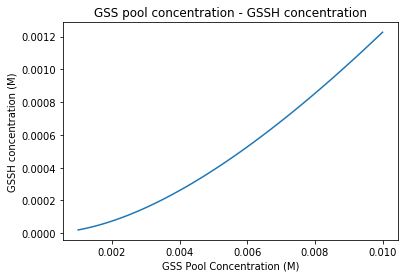

In [92]:
# Store solution
exp_gssh = exp_gsshs[0]
gsspool = np.linspace(1e-3,10e-3,100)

# Plotting seriers
f = lambdify(gss_pool, exp_gssh, "numpy")
plt.plot(gsspool, f(gsspool))
plt.ylabel('GSSH concentration (M)')
plt.xlabel('GSS Pool Concentration (M)')
plt.title('GSS pool concentration - GSSH concentration')